
<img src="https://matplotlib.org/_static/logo2_compressed.svg" width="1000">




.

.


.

.

.

.

## Motiva√ß√£o



* Desenhar plots e visualiza√ß√µes est√°ticas ou interativas √© uma das tarefas mais importantes em an√°lise de dados
* √â parte do processo explorat√≥rio (EDA - Exploratory Data Analysis)
* Ajuda a identificar outliers, necessidades de transforma√ß√µes de dados ou trazer insights para modelos



---

<img src="https://i.pinimg.com/originals/fa/98/89/fa98897d4ec8b2f37aa08ffe0fd260cd.png" width="400">

---

<img src="https://itom.bitbucket.io/v1-3-0/docs/_images/matplotlib_intro.png" width="400">

---

<img src="https://matplotlib.org/_images/sphx_glr_subplot_0011.png" width="400">



## A Biblioteca Matplotlib - Fundamentos

[https://matplotlib.org/](https://matplotlib.org/)

* matplotlib √© uma biblioteca **primariamente 2D** projetada para criar plots de qualidade
* O projeto foi iniciado por John Hunter em 2002 com o intuito de prover uma interface de **plots como MATLAB** em Python
* Exporta gr√°ficos para todos os formatos comuns: PDF, SVG, JPG, PNG, BMP, GIF, etc

### Importando o m√≥dulo matplotlib.pyplot

* Fun√ß√µes da Matplotib API como plot e close est√£o dentro do m√≥dulo matplotlib.pyplot, que √© tipicamente importado por conven√ß√£o como:


In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt

### Figuras e subplots

* Plots no matplotlib ficam dentro de um objeto "Figura".

* O objeto "Figura" tem v√°rias propriedades, sendo a mais utilizada:
  
 *  figsize (float, float) (default: [6.4, 4.8])
Width, height in inches


Para criar uma nova figura:

In [ ]:
fig = plt.figure(figsize=(6.4,4.8))

<Figure size 460.8x345.6 with 0 Axes>



*   Dentro do objeto "Figura" s√£o adicionados **subplots**
*   **Subplots** s√£o quantos gr√°ficos ter√£o na Figura
* Tipicamente passamos o **n√∫mero de linhas** e o **n√∫mero de colunas**, indicando a distribui√ß√£o dos gr√°ficos na figura



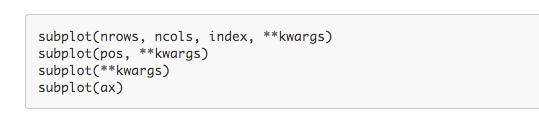

<Figure size 460.8x345.6 with 0 Axes>

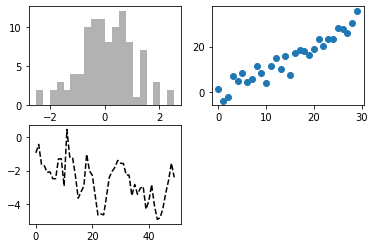

In [ ]:
# Exemplo de Figura com 3 subplots
ax1 = plt.subplot(2, 2, 1)
ax1.hist(randn(100), bins=20, color='k', alpha=0.3)

ax2 = plt.subplot(2, 2, 2)
ax2.scatter(np.arange(30), np.arange(30) + 3 * randn(30))

ax3 = plt.subplot(2, 2, 3)
from numpy.random import randn
ax3.plot(randn(50).cumsum(), 'k--')

fig

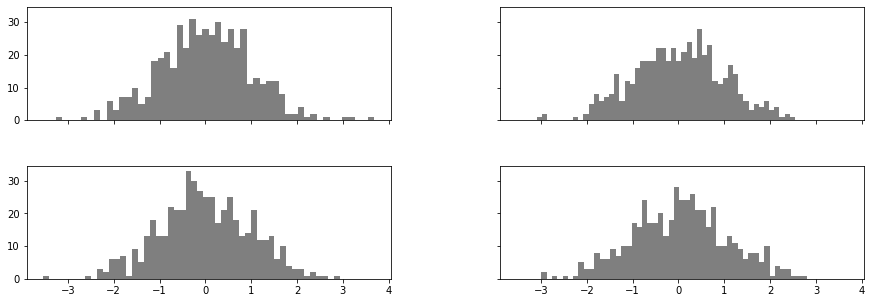

In [ ]:
# Exemplo criando os subplots junto com a figura

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15,5)) 
for i in range(2):
  for j in range(2):
    axes[i, j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0.3, hspace=0.4)

### Cores, Marcadores e Estilos de Linhas



*   Aceita uma string abreviando (cor, estilo da linha e marcador)
*   Ou cada propriedade pode ser passada como argumento



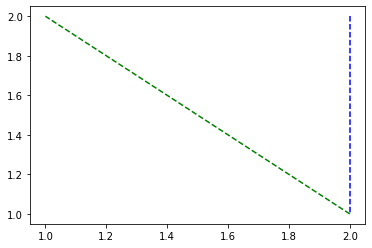

In [ ]:
# Exemplo de string abreviando cor e estilo da linha

fig = plt.plot([2,1], [1,2], 'g--')
plt.plot([2,2], [2,1], 'b--')
fig

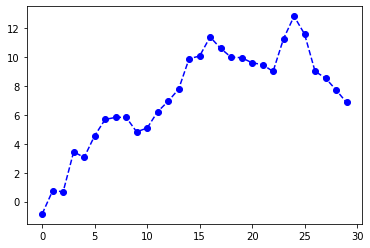

In [ ]:
# Exemplo de string abreviando cor, marcador e estilo da linha

plt.plot(randn(30).cumsum(), 'bo--')

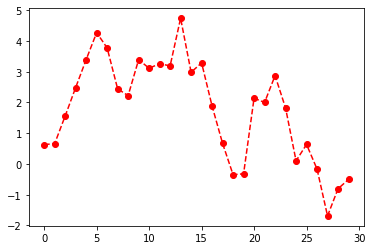

In [ ]:
# Exemplo passando as propriedades como argumentos
plt.plot(randn(30).cumsum(), color='r', linestyle='dashed', marker='o')

### Ticks, Labels e Legendas



*   Ticks s√£o os marcadores dos eixos
*   Labels s√£o os nomes
  * x tick labels
  * x label
  * label para a s√©rie sendo "plotada"
* Legendas s√£o explicitamente definidas, com base nos labels de cada s√©rie "plotada"



Text(0.5, 0, 'Stages')

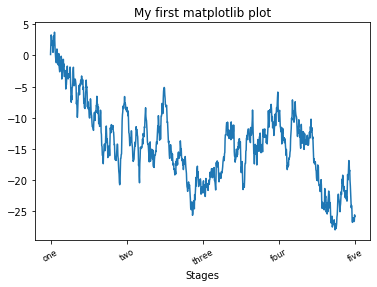

In [ ]:
# Exemplo de um gr√°fico simples com t√≠tulo e 
# labels no eixo x

fig = plt.figure()
ax = plt.subplot(1, 1, 1)
ax.plot(randn(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

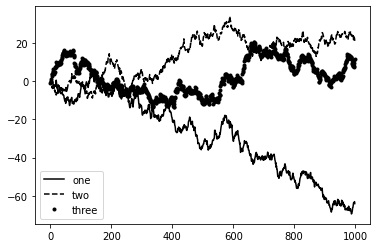

In [ ]:
# Exemplo de legenda em um gr√°fico

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')
ax.legend(loc='best')

Text(0.1, 0.5, 'Hello world!')

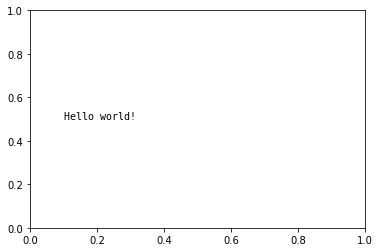

In [ ]:
# Exemplo de um texto adicionado em um gr√°fico

fig = plt.figure()
ax = plt.subplot(1, 1, 1)
ax.text(0.1, 0.5, 'Hello world!', family='monospace', fontsize=10)


### Exemplo completo de um gr√°fico gerado com dados a partir de um .csv

In [ ]:
import pandas as pd

data = pd.read_csv('pydata-book-master_ch08_spx.csv', index_col=0, parse_dates=True) 
data.head()

SPX
1990-02-01  328.79
1990-02-02  330.92
1990-02-05  331.85
1990-02-06  329.66
1990-02-07  333.75

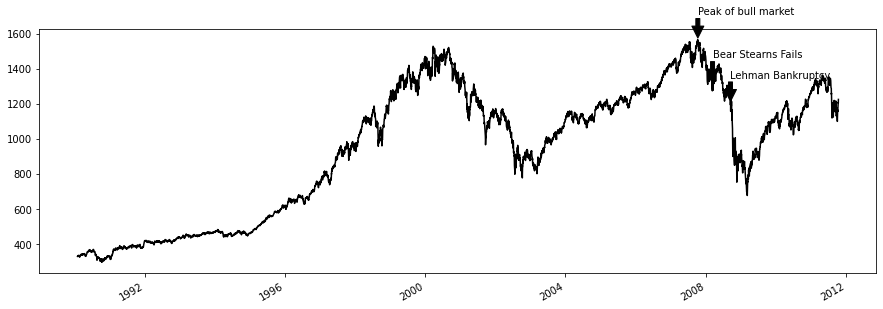

In [ ]:
from datetime import datetime

fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1, 1, 1)

spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
  (datetime(2007, 10, 11), 'Peak of bull market'), 
  (datetime(2008, 3, 12), 'Bear Stearns Fails'), 
  (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
  ax.annotate(label, xy=(date, spx.asof(date) + 20),
    xytext=(date, spx.asof(date) + 200), 
    arrowprops=dict(facecolor='black'), 
    horizontalalignment='left', 
    verticalalignment='top')


### Salvando figuras em arquivos

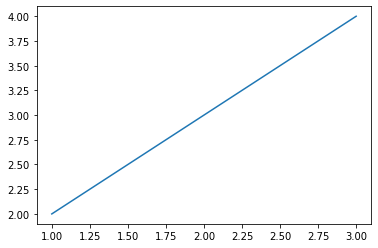

In [ ]:
fig = plt.figure()
ax = plt.subplot(1,1,1)
ax.plot([1,2,3],[2,3,4])
plt.savefig('my_fig.png')

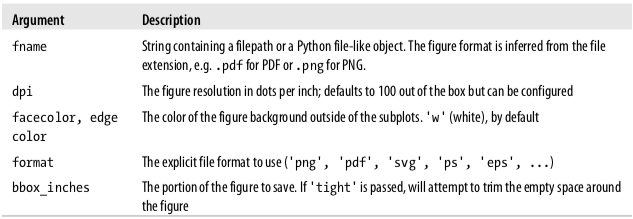

### Resumindo os conceitos

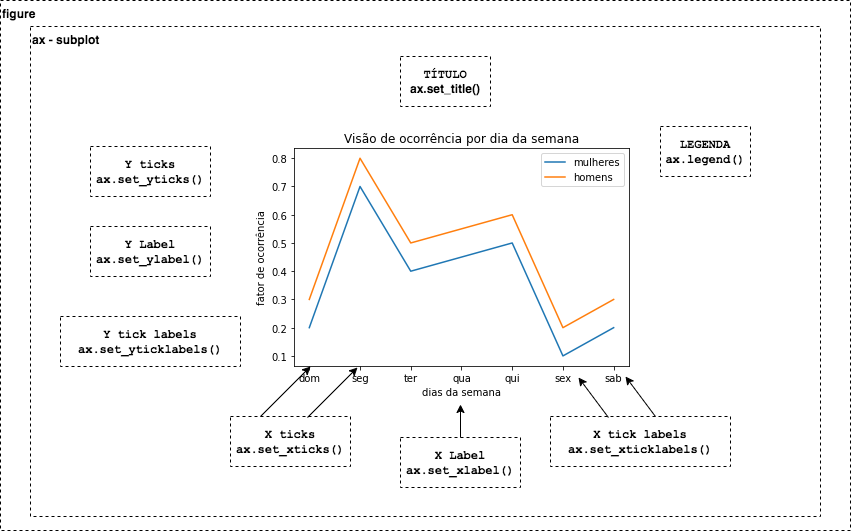

### Hands-on

Desenhar 1 gr√°fico:

*   cujos valores do eixo x s√£o: [1,2,3,4,5,6,7]
*   cujos valores do eixo y para o grupo de mulheres s√£o: [0.2,0.7,0.4,0.45,0.5,0.1,0.2]
*   cujos valores do eixo y para o grupo de homens s√£o: [0.3,0.8,0.5,0.55,0.6,0.2,0.3]
* com o t√≠tulo: 'Vis√£o de ocorr√™ncia por dia da semana'
* com o t√≠tulo do eixo x: 'dias da semana'
* com o t√≠tulo do eixo y: 'fator de ocorr√™ncia'
* com legenda discriminando entre homens e mulheres



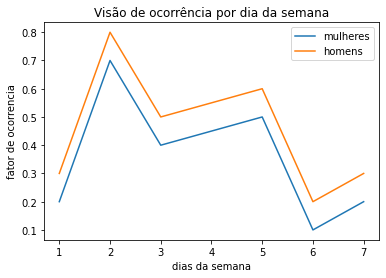

In [ ]:
fig = plt.figure()
ax = plt.subplot(1,1,1)

x = [1,2,3,4,5,6,7]
y_m = [0.2,0.7,0.4,0.45,0.5,0.1,0.2]
y_h = [0.3,0.8,0.5,0.55,0.6,0.2,0.3]

ax.plot(x, y_m, label='mulheres')
ax.plot(x, y_h, label='homens')
ax.set_title('Vis√£o de ocorr√™ncia por dia da semana')
ax.set_xlabel('dias da semana')
ax.set_ylabel('fator de ocorrencia')
ax.legend(loc='best')

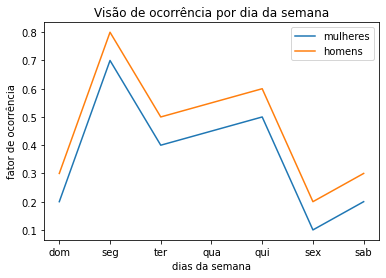

In [ ]:
## resposta hands-on ##

fig = plt.figure()
ax = plt.subplot(1,1,1)
ax.plot([1,2,3,4,5,6,7], [0.2,0.7,0.4,0.45,0.5,0.1,0.2], label = 'mulheres' )
ax.plot([1,2,3,4,5,6,7], [0.3,0.8,0.5,0.55,0.6,0.2,0.3], label = 'homens' )
ax.set_title('Vis√£o de ocorr√™ncia por dia da semana')
ax.set_ylabel('fator de ocorr√™ncia')
ax.set_xlabel('dias da semana')

ax.set_xticks([1,2,3,4,5,6,7])
ax.set_xticklabels(['dom','seg','ter','qua','qui','sex','sab'])

ax.legend(loc='best')

## Matplotlib + pandas

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris_df.tail()

sepal length (cm)  sepal width (cm)  ...  petal width (cm)  target
145                6.7               3.0  ...               2.3     2.0
146                6.3               2.5  ...               1.9     2.0
147                6.5               3.0  ...               2.0     2.0
148                6.2               3.4  ...               2.3     2.0
149                5.9               3.0  ...               1.8     2.0

[5 rows x 5 columns]

### Bar plots

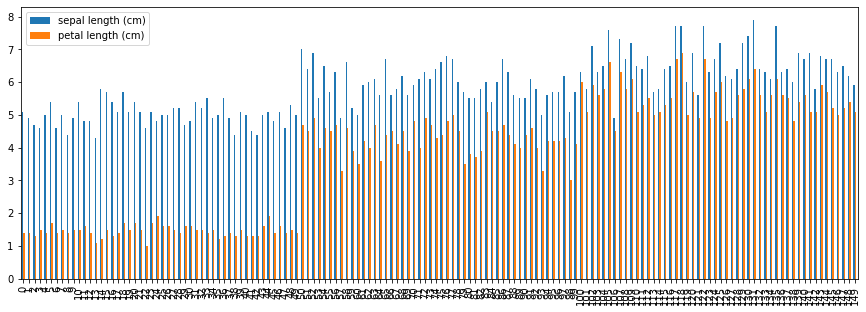

In [ ]:
iris_df[['sepal length (cm)', 'petal length (cm)']].plot(kind='bar', 
                                                         figsize=(15,5))

### Histogramas

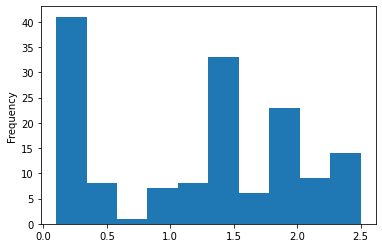

In [ ]:
iris_df['petal width (cm)'].plot(kind='hist')

### Boxplots

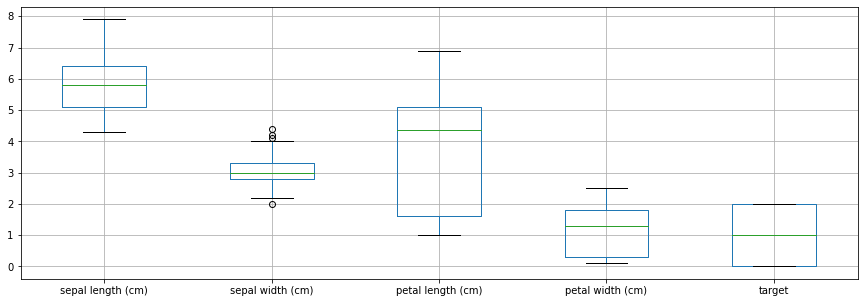

In [ ]:
iris_df.boxplot(figsize=(15,5))

### Scatter plots

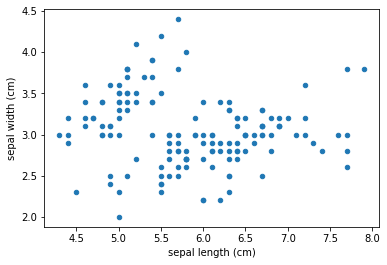

In [ ]:
iris_df.plot('sepal length (cm)', 'sepal width (cm)', kind='scatter')

### Line plots

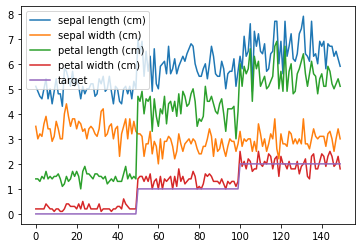

In [ ]:
iris_df.plot()

### Pie plots

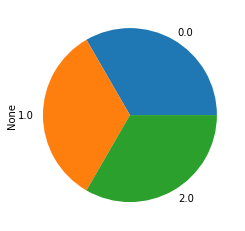

In [ ]:
iris_df.groupby('target').size().plot( kind='pie')

### Correlation Matrix

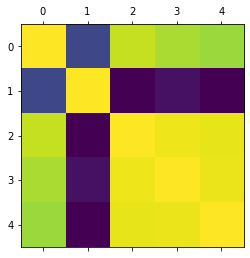

In [ ]:
plt.matshow(iris_df.corr())
plt.show()

## Outras bibliotecas de visualiza√ß√£o

Python
* Pyplot (https://plotly.com/)
* Seaborn (https://seaborn.pydata.org/)
* Bokeh (https://docs.bokeh.org/en/latest/index.html)

Javascript
* d3.js (https://d3js.org/)
* Plotly (https://plotly.com/javascript/)

### Pairplot

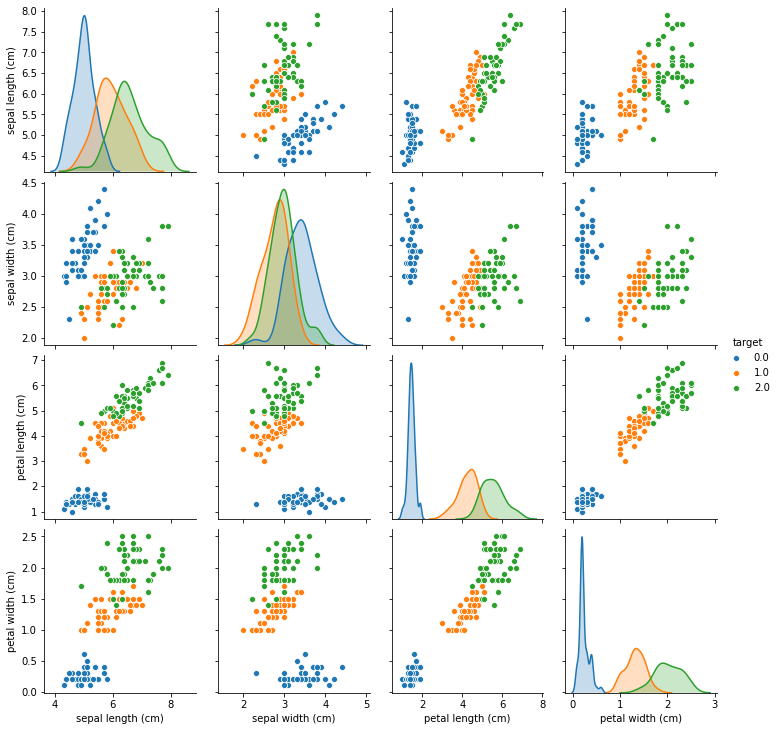

In [ ]:
import seaborn as sns

sns.pairplot(iris_df, hue='target')

### Violins

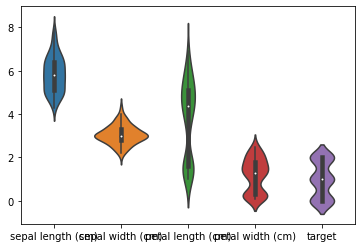

In [ ]:
sns.violinplot(data=iris_df)

### Sliders

In [ ]:
import plotly.graph_objects as go
import numpy as np

# Create figure
fig = go.Figure()

# Add traces, one for each slider step
for step in np.arange(0, 5, 0.1):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            name="ùúà = " + str(step),
            x=np.arange(0, 10, 0.01),
            y=np.sin(step * np.arange(0, 10, 0.01))))

# Make 10th trace visible
fig.data[10].visible = True

# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Slider switched to step: " + str(i)}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

In [ ]:
import plotly.express as px

df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

fig["layout"].pop("updatemenus") # optional, drop animation buttons
fig.show()

# Refer√™ncias

* Wes McKinney. Python for Data Analysis. 2012. ISBN: 9781449319793 (https://www.oreilly.com/library/view/python-for-data/9781449323592/)